In [2]:
%matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt
dimensions=5
randomTimes=2000
updateFactor=0.5

In [3]:
x=[]
for i in range(dimensions):
    x.append([])
y=[]
updatesRecord=[]

In [4]:
#read training data
with open('hw1_15_train.txt') as f:
    for line in f:
        for i,value in enumerate(line.split()):
            if i<4:
                x[i+1].append(float(value))
            else:
                y.append(int(value))
    f.close()
x[0]=np.ones(len(x[1]))

In [5]:
randomList=list(range(len(x[0])))
#print(randomList)
totalUpdates=0
for times in range(randomTimes):
    #generate random cycle
    #print(times);
    rand.shuffle(randomList)
    #print(randomList)
    #PLA training
    w=np.zeros(dimensions)
    #update counter
    updates=0
    while True:
        isUpdate=False;
        for j in range(len(x[0])):
            innerProduct=0
            for k in range(dimensions):
                innerProduct=innerProduct+w[k]*x[k][randomList[j]]
            #if error, update w
            if (innerProduct<=0)!= (y[randomList[j]]<0):
                for k in range(dimensions):
                    w[k]=w[k]+updateFactor*y[randomList[j]]*x[k][randomList[j]]
                #print(j);
                isUpdate=True
                updates=updates+1
                #print("updates:",updates)
                lastUpdateIndex=randomList[j]
                continue
            if randomList[j]==lastUpdateIndex:
                break;
        if not isUpdate:
            break
    totalUpdates=totalUpdates+updates
    updatesRecord.append(updates)

In [6]:
print("PLA average updates:",totalUpdates/randomTimes)
# #PLA training verification
# print("PLA updates count:",updates);
# y2=[];
# for i in range(len(x[0])):
#     innerProduct=0;
#     for j in range(dimensions):
#         innerProduct=innerProduct+w[j]*x[j][i];
#     if innerProduct>0:
#         y2.append(1);
#     elif innerProduct<=0:
#         y2.append(-1);
# if y==y2:
#     print("PLA training verification: successed");
# else:
#     print("PLA training verification: failed");


PLA average updates: 39.345


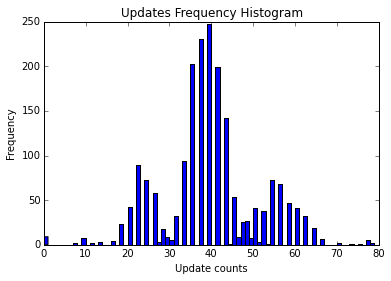

In [7]:
plt.hist(updatesRecord,bins=max(updatesRecord)-min(updatesRecord))
plt.title("Updates Frequency Histogram")
plt.xlabel("Update counts")
plt.ylabel("Frequency")
plt.show()